In [2]:
# Library and data import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
from google.colab import drive
drive.mount('/content/drive')
posting = r'/content/drive/MyDrive/archive-8/job_postings.csv'
data=pd.read_csv(posting)

# Print first few rows of the dataset
print(data.head())


Mounted at /content/drive
       job_id  company_id                                              title  \
0  3757940104    553718.0                              Hearing Care Provider   
1  3757940025   2192142.0  Shipping & Receiving Associate 2nd shift (Beav...   
2  3757938019    474443.0                               Manager, Engineering   
3  3757938018  18213359.0                                               Cook   
4  3757937095    437225.0        Principal Cloud Security Architect (Remote)   

                                         description  max_salary  med_salary  \
0  Overview\n\nHearingLife is a national hearing ...         NaN     5250.00   
1  Metalcraft of Mayville\nMetalcraft of Mayville...         NaN         NaN   
2  \nThe TSUBAKI name is synonymous with excellen...         NaN         NaN   
3  descriptionTitle\n\n Looking for a great oppor...         NaN       22.27   
4  Job Summary\nAt iHerb, we are on a mission to ...    275834.0         NaN   

   min_salar

# Employment Postings Dataset Inspection

## Overview

We examine a dataset with details about job postings in this notebook. Our goal is to comprehend numerous trends and patterns and acquire insights into the attributes of the jobs mentioned in the collection.

## Data Import and Libraries

The first step is importing the necessary libraries for data analysis and visualization, such as matplotlib, seaborn, and pandas. In addition, we mount Google Drive so that we may access the Google Drive dataset.

Importing pandas as pd, seaborn as sns, and matplotlib as python.Python plot as plt

To access the dataset, mount Google Drive by using the command drive.mount('/content/drive') from google.colab.



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Drop rows with missing 'formatted_experience_level' values
data.dropna(subset=['formatted_experience_level'], inplace=True)

# Define features (X) and target variable (y)
X = data[['med_salary', 'remote_allowed', 'sponsored']]
y = data['formatted_experience_level']

# Combine X and y into a single DataFrame and drop missing values
data_cleaned = pd.concat([X, y], axis=1).dropna()

# Define features (X) and target variable (y) after dropping missing values
X = data_cleaned[['med_salary', 'remote_allowed', 'sponsored']]
y = data_cleaned['formatted_experience_level']

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Train the classifier
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.44


The given code uses K-Nearest Neighbors (KNN) classification to forecast job posting experience levels based on a number of criteria, including sponsorship, remote work availability, and median salary. To maintain data integrity, any rows in the 'formatted_experience_level' column that have missing values are first removed. After splitting the dataset into the target variable (y) and features (X), any leftover rows with missing values are removed in order to undertake additional cleaning. Next, categorical labels are translated into numerical values by encoding the target variable (y) using LabelEncoder. After that, the data is split into testing and training sets in order to evaluate the performance of the model. The characteristics are normalized using MinMaxScaler to provide consistent scaling.


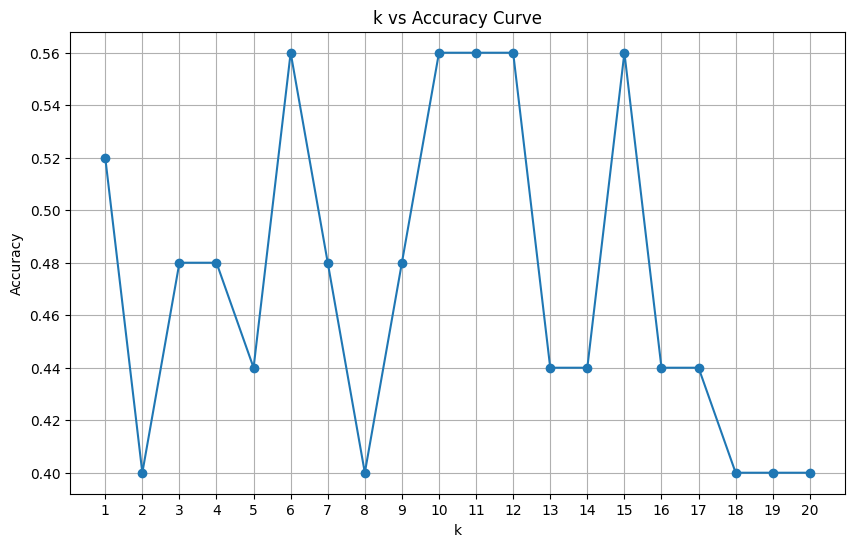

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a range of k values
k_values = range(1, 21)

# Initialize lists to store accuracy scores
accuracy_scores = []

# Iterate over each k value
for k in k_values:
    # Initialize KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test_scaled)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot k vs Accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('k vs Accuracy Curve')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


creates a k vs. Accuracy curve when a dataset is applied to a K-Nearest Neighbors (KNN) classifier. It implements KNN classification and assesses the model's accuracy using the sklearn package. The number of neighbors to be taken into account for categorization is first defined as a range of k values between 1 and 20. The KNN classifier is instantiated and trained with the scaled training data for each value of k. After that, predictions are generated on the test set, and the accuracy_score function is used to determine the classifier's accuracy. Lists are used to hold the accuracy ratings for various k values. Finally, using matplotlib, the k vs. Accuracy curve is shown, with k values on the x-axis and matching accuracy scores on the y-axis.


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN classifier with k=6
knn = KNeighborsClassifier(n_neighbors=6)

# Train the classifier
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with k=6:", accuracy)


Accuracy with k=6: 0.56


It shows how to use a K-Nearest Neighbors (KNN) classifier with k=6 for a particular dataset. To assess classifier performance, the accuracy_score measure and the KNeighborsClassifier from the sklearn library are first loaded. After that, the number k=6 is used to initialize a KNN classifier. Next, using the scaled training data (X_train_scaled and y_train), the classifier is trained. The trained classifier is used to make predictions on the test set, X_test_scaled. Using the accuracy_score function, the predicted labels and actual labels in the y_test are compared to determine the classifier's accuracy. In order to facilitate evaluation, the accuracy of the KNN classifier with k=6 is finally written to the console. This bit of code makes it possible to evaluate the classifier's performance using a certain option.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Decision Tree classifier with balanced class weights
dt_classifier = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         2
           2       0.75      0.67      0.71         9
           3       1.00      1.00      1.00         3
           4       0.00      0.00      0.00         1
           5       0.50      1.00      0.67         6

    accuracy                           0.60        25
   macro avg       0.38      0.44      0.40        25
weighted avg       0.51      0.60      0.53        25



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The required libraries for working with data and creating models are imported by the code. It uses balanced class weights to initialize a decision tree classifier, trains it on the dataset, and assesses its accuracy. In order to give specific performance indicators for the model, a categorization report is finally prepared.


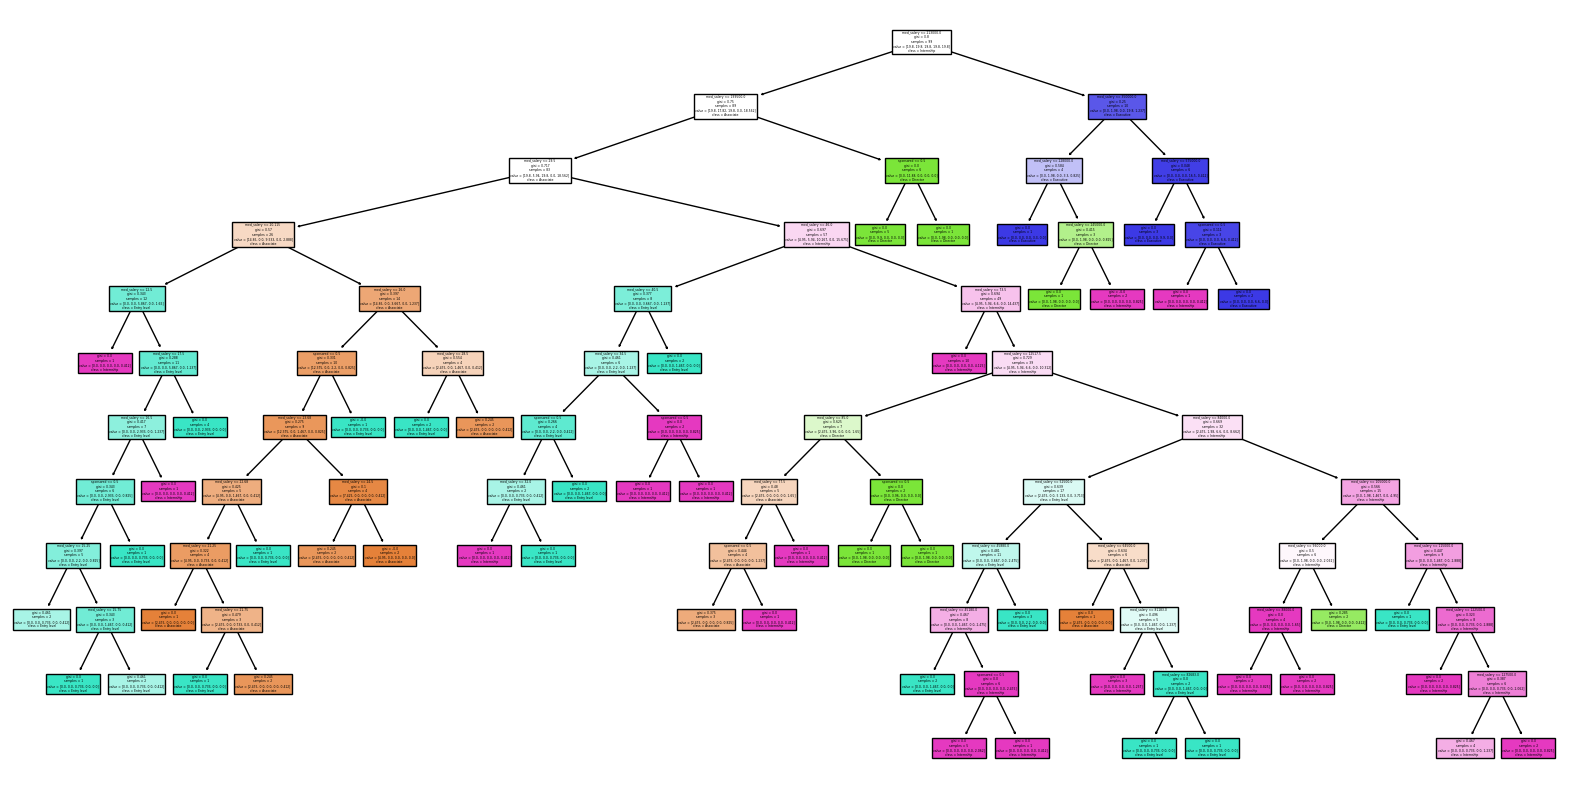

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=label_encoder.classes_)
plt.show()


To visually illustrate the decision tree model, the code makes use of the plot_tree function in scikit-learn and Matplotlib. Understanding the model's behavior and structure is made easier by the resulting visualization, which uses features and class labels to illustrate the decision-making process.


In [8]:
text_data = data.select_dtypes(include=[object])
numerical_data = data.select_dtypes(exclude=[object])

In [9]:
job_ids = data['job_id'].tolist()
text_data.insert(0,'job_id',job_ids)

In [10]:
print(text_data.head())

       job_id                                        title  \
0  3757940104                        Hearing Care Provider   
3  3757938018                                         Cook   
4  3757937095  Principal Cloud Security Architect (Remote)   
5  3757937037                Territory Manager - New Haven   
6  3757937004                          Auto Body Techncian   

                                         description pay_period  \
0  Overview\n\nHearingLife is a national hearing ...    MONTHLY   
3  descriptionTitle\n\n Looking for a great oppor...     HOURLY   
4  Job Summary\nAt iHerb, we are on a mission to ...     YEARLY   
5  Location: Remote, CT, United States of America...        NaN   
6  Company: Gerber Collision & Glass\n\nWELCOME T...        NaN   

  formatted_work_type           location  \
0           Full-time   Little River, SC   
3           Full-time    Aliso Viejo, CA   
4           Full-time      United States   
5           Full-time      United States   
6   

In [11]:
col_to_remove=['pay_period','job_posting_url','application_url','application_type','skills_desc','posting_domain','currency','compensation_type']
text_data = text_data.drop(columns=col_to_remove)

print(text_data.head())

       job_id                                        title  \
0  3757940104                        Hearing Care Provider   
3  3757938018                                         Cook   
4  3757937095  Principal Cloud Security Architect (Remote)   
5  3757937037                Territory Manager - New Haven   
6  3757937004                          Auto Body Techncian   

                                         description formatted_work_type  \
0  Overview\n\nHearingLife is a national hearing ...           Full-time   
3  descriptionTitle\n\n Looking for a great oppor...           Full-time   
4  Job Summary\nAt iHerb, we are on a mission to ...           Full-time   
5  Location: Remote, CT, United States of America...           Full-time   
6  Company: Gerber Collision & Glass\n\nWELCOME T...           Full-time   

            location formatted_experience_level  work_type  
0   Little River, SC                Entry level  FULL_TIME  
3    Aliso Viejo, CA                Entry level 

In [12]:
print(numerical_data.head())

       job_id  company_id  max_salary  med_salary  min_salary  applies  \
0  3757940104    553718.0         NaN     5250.00         NaN      NaN   
3  3757938018  18213359.0         NaN       22.27         NaN      NaN   
4  3757937095    437225.0    275834.0         NaN    205956.0      NaN   
5  3757937037     13727.0         NaN         NaN         NaN      NaN   
6  3757937004  10515052.0         NaN         NaN         NaN      NaN   

   original_listed_time  remote_allowed  views        expiry   closed_time  \
0          1.699090e+12             NaN    9.0  1.701680e+12           NaN   
3          1.699080e+12             NaN    1.0  1.701680e+12           NaN   
4          1.698970e+12             1.0    NaN  1.701680e+12           NaN   
5          1.698720e+12             1.0   16.0  1.701680e+12  1.700000e+12   
6          1.699080e+12             NaN    1.0  1.701680e+12           NaN   

    listed_time  sponsored     scraped  
0  1.699090e+12          0  1699138101  
3  1

In [13]:
cols_to_remove=['company_id','applies','original_listed_time','views','expiry','closed_time','listed_time','scraped']
numerical_data = numerical_data.drop(columns=cols_to_remove)

print(numerical_data.head())

       job_id  max_salary  med_salary  min_salary  remote_allowed  sponsored
0  3757940104         NaN     5250.00         NaN             NaN          0
3  3757938018         NaN       22.27         NaN             NaN          0
4  3757937095    275834.0         NaN    205956.0             1.0          0
5  3757937037         NaN         NaN         NaN             1.0          0
6  3757937004         NaN         NaN         NaN             NaN          0


In [14]:
merged_data = pd.merge(text_data, numerical_data, on='job_id')

# Display the merged DataFrame
print(merged_data.head())

       job_id                                        title  \
0  3757940104                        Hearing Care Provider   
1  3757938018                                         Cook   
2  3757937095  Principal Cloud Security Architect (Remote)   
3  3757937037                Territory Manager - New Haven   
4  3757937004                          Auto Body Techncian   

                                         description formatted_work_type  \
0  Overview\n\nHearingLife is a national hearing ...           Full-time   
1  descriptionTitle\n\n Looking for a great oppor...           Full-time   
2  Job Summary\nAt iHerb, we are on a mission to ...           Full-time   
3  Location: Remote, CT, United States of America...           Full-time   
4  Company: Gerber Collision & Glass\n\nWELCOME T...           Full-time   

            location formatted_experience_level  work_type  max_salary  \
0   Little River, SC                Entry level  FULL_TIME         NaN   
1    Aliso Viejo, CA  

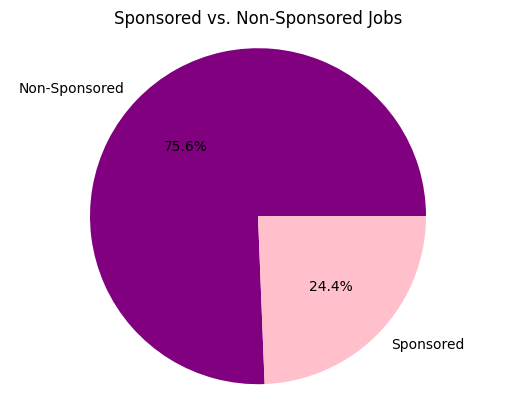

In [15]:
import matplotlib.pyplot as plt

# Count occurrences of sponsored
sponsored_counts = merged_data['sponsored'].value_counts()

# Plot pie chart
plt.pie(sponsored_counts, labels=['Non-Sponsored', 'Sponsored'], autopct='%1.1f%%', colors=['purple', 'pink'])
plt.title('Sponsored vs. Non-Sponsored Jobs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


This shows how sponsored and non-sponsored jobs are distributed throughout the dataset, the code creates a pie chart. It uses the matplotlib plt.pie() function to construct the pie chart, counts the occurrences of each category, formats the percentage labels, assigns colors, sets the title, and makes sure the chart keeps an equal aspect ratio. This graphic sheds light on the ratio of sponsored to non-sponsored employment.


In [16]:
distinct_values = merged_data['work_type'].unique()

# Display the distinct values
print(distinct_values)

['FULL_TIME' 'CONTRACT' 'PART_TIME' 'TEMPORARY' 'OTHER' 'VOLUNTEER'
 'INTERNSHIP']


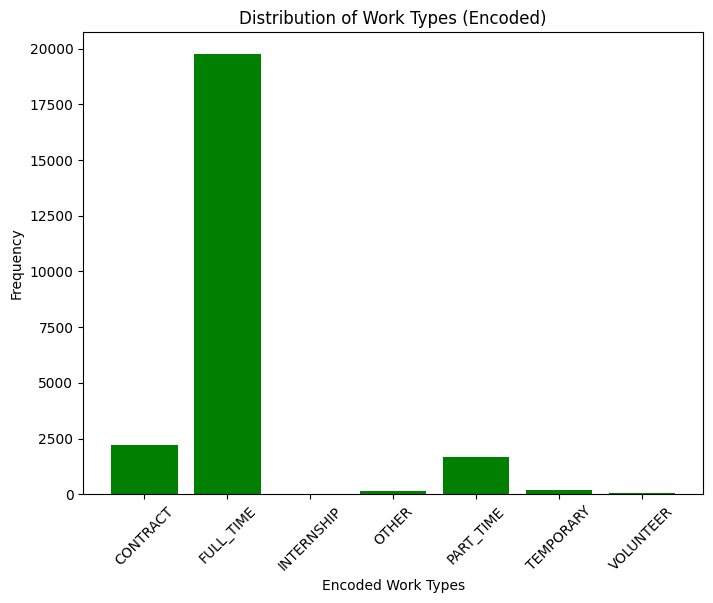

In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'merged_data' with a column named 'work_type'
# And you want to create a visualization from the 'work_type' column

# Create a label encoder instance
label_encoder = LabelEncoder()

# Fit and transform the 'work_type' column to label encode the categorical values
merged_data['work_type_encoded'] = label_encoder.fit_transform(merged_data['work_type'])

# Create a bar plot of the encoded 'work_type' column
plt.figure(figsize=(8, 6))
plt.bar(merged_data['work_type_encoded'].unique(), merged_data['work_type_encoded'].value_counts(), color='green')
plt.title('Distribution of Work Types (Encoded)')
plt.xlabel('Encoded Work Types')
plt.ylabel('Frequency')
plt.xticks(merged_data['work_type_encoded'].unique(), label_encoder.inverse_transform(merged_data['work_type_encoded'].unique()), rotation=45)
plt.show()


This code snippet uses sklearn's LabelEncoder to conduct label encoding on the 'work_type' column of a DataFrame named'merged_data. To show the distribution of the encoded work categories, a bar plot is subsequently created. Each encoded category's frequency is displayed on the y-axis, and the encoded labor kinds are represented on the x-axis. Following label encoding, the graphic facilitates easy comparison of the frequency of each category by illuminating the distribution of work types in the dataset.


In [18]:
new_dataframe = pd.DataFrame(data['formatted_experience_level'])

ndf=new_dataframe.dropna()

distinct_values = ndf['formatted_experience_level'].unique()

# Display the distinct values
print(distinct_values)

['Entry level' 'Mid-Senior level' 'Director' 'Associate' 'Executive'
 'Internship']


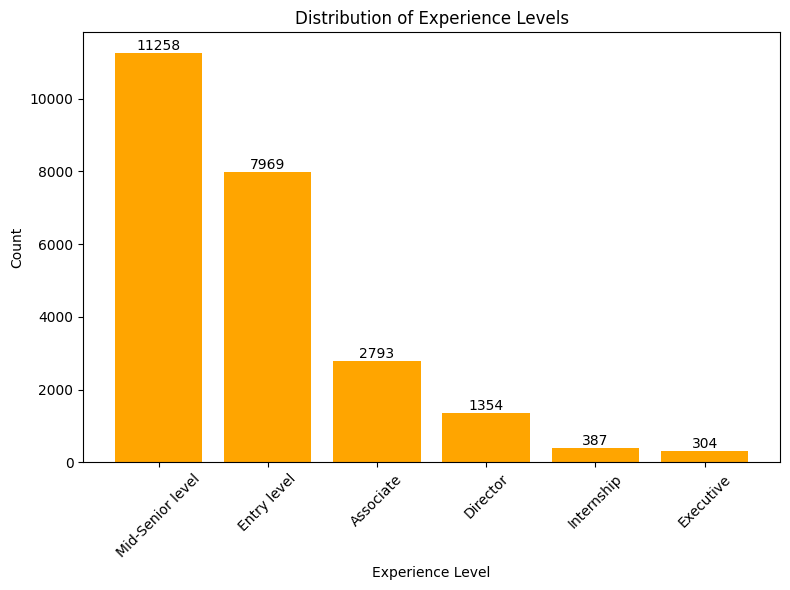

In [19]:
import matplotlib.pyplot as plt

# Assuming you have the distinct values stored in the 'distinct_values' variable
distinct_values = ['Entry level', 'Mid-Senior level', 'Director', 'Associate', 'Executive', 'Internship']

# Count occurrences of each unique value
value_counts = ndf['formatted_experience_level'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values, color='orange')

# Annotate the count on each bar
for i, count in enumerate(value_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Based on the information kept in the 'formatted_experience_level' column, this code snippet creates a bar plot to show the distribution of experience levels. The different experience levels are represented by the x-axis, while the number of each experience level is shown on the y-axis. The corresponding count of each bar is labeled to offer a clear understanding of the frequency of each experience level. The graphic provides a clear illustration of the dataset's experience level distribution, making interpretation and analysis simple.


In [23]:
import os
import matplotlib as mpl
import sklearn
import bs4

# Specify the file path
file_path = '/content/drive/MyDrive/archive-8/requirements.txt'

# Open a text file in write mode
try:
    with open(file_path, 'w') as file:
        # Write versions of libraries to the file
        file.write("pandas==" + pd.__version__ + "\n")
        file.write("seaborn==" + sns.__version__ + "\n")
        file.write("matplotlib==" + mpl.__version__ + "\n")
        file.write("scikit-learn==" + sklearn.__version__ + "\n")
        file.write("beautifulsoup4==" + bs4.__version__ + "\n")  # Use bs4 instead of BeautifulSoup
    print("Library versions saved to", file_path)
except Exception as e:
    print("Error:", e)


Library versions saved to /content/drive/MyDrive/archive-8/requirements.txt
